# Experiments

***Changes***
- New features added to the state vector
- Graph fixed
- Environment refactored

In [72]:
# Libraries.

import matplotlib.pyplot as plt
import pandas as pd
import environments

from stable_baselines3 import A2C
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']=16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.figsize']=16,5.5

In [73]:
# Read data.
data = pd.read_csv('data_sp.csv')

In [74]:
# Split percentage of the data
splitter = round(data.shape[0] * .7)
splitter

1198

In [75]:
# Split the dataset.
# TODO: Function to automate these.
# TODO: Label the data.
df_train = data.iloc[:splitter]
df_test = data.iloc[splitter:]

In [76]:
# Create the environment.
env = environments.Forecasting(
    df=df_train, window_size=5
)

In [77]:
# Random walk.
state = env.reset(seed=2008)

while True:
    # Sample action from space.
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(
        action=action
    )

    if done or truncated:
        print('info', info, '\n')
        break

info {'total_reward': 822.8999481201172} 



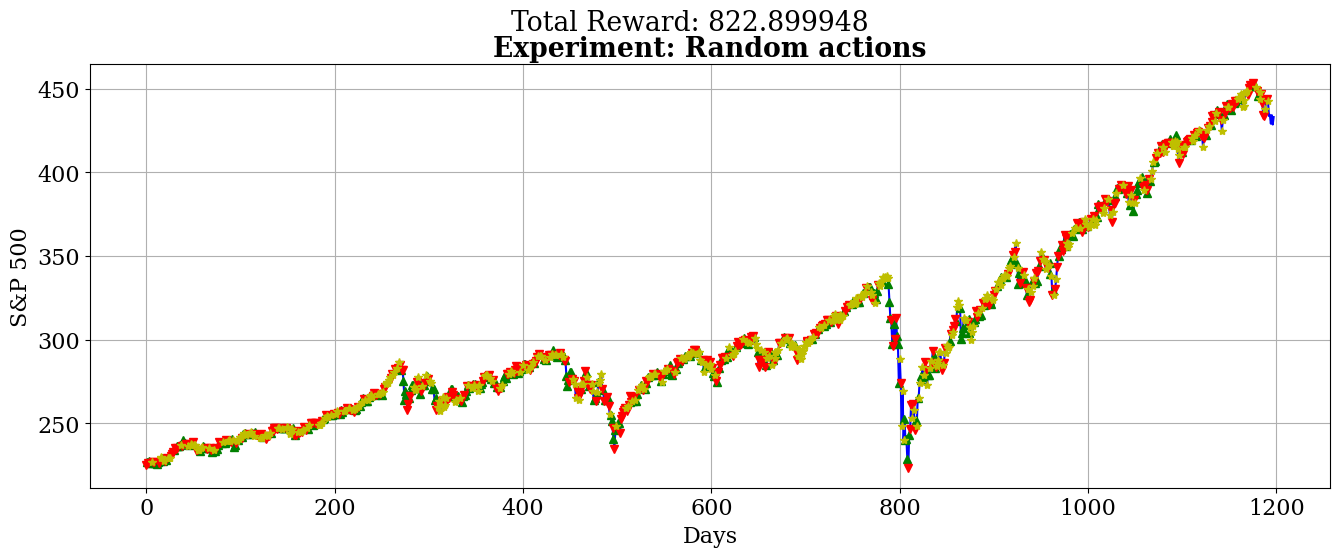

In [78]:
plt.figure()
plt.cla()
env.render_all(title='Experiment: Random actions')
plt.xlabel('Days')
plt.ylabel('S&P 500')
plt.show()

In [104]:
import torch as th
# Train environment.
# Arquitectura personalizada
policy_kwargs2 = dict(activation_fn=th.nn.ReLU6,
                     net_arch=dict(pi=[64, 64], vf=[64, 64]))
model = A2C(policy='MlpPolicy', env= env,policy_kwargs=policy_kwargs2, verbose=1) 
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 382      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.0264  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.03     |
|    value_loss         | 101      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 405      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0255  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates    

In [105]:
observation, info = env.reset()

while True:
    action, _states = model.predict(observation=observation)
    observation, reward, done, truncated, info = env.step(action=action)

    if done or truncated:
        print('info', info, '\n')
        break

info {'total_reward': 1387.9398040771484} 



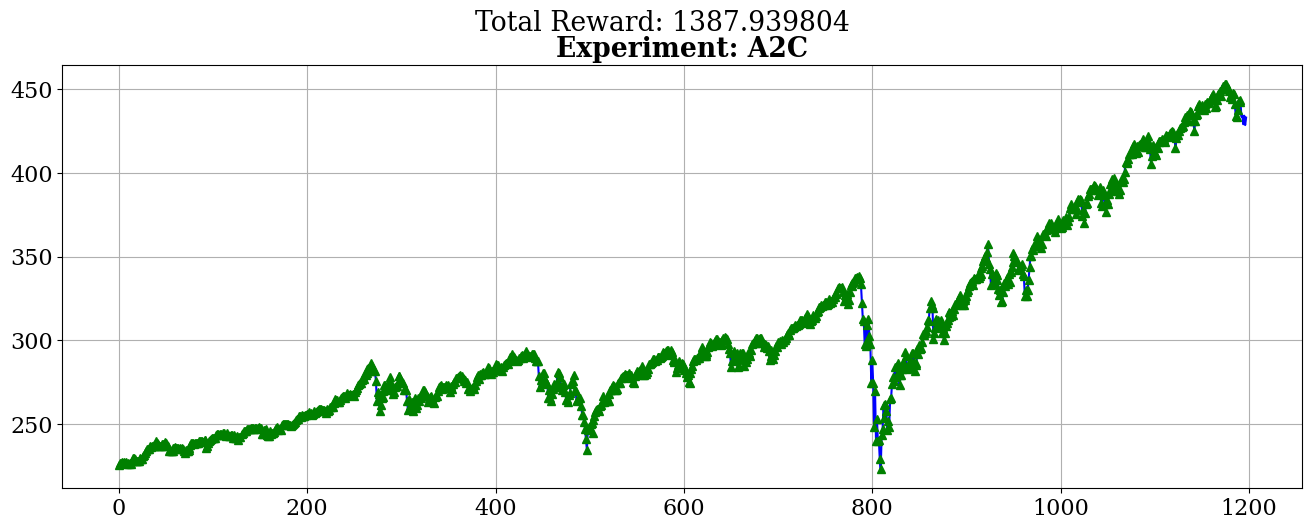

In [106]:
plt.figure()
plt.cla()
env.render_all(title='Experiment: A2C')
plt.show()